In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the CSV data
csv_path = r"C:\Users\USER\Downloads\PD audio\parkinson+dataset+with+replicated+acoustic+features\ReplicatedAcousticFeatures-ParkinsonDatabase.csv"
data = pd.read_csv(csv_path)

# Define the folder path for saving images
folder_path = r"C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2"

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Define the features to include in the time series images
selected_features = [
    'Jitter_rel', 'Jitter_abs', 'Jitter_RAP', 'Jitter_PPQ',
    'Shim_loc', 'Shim_dB', 'Shim_APQ3', 'Shim_APQ5', 'HNR05',
    'HNR15', 'HNR25', 'HNR35', 'HNR38', 'MFCC0', 'MFCC1', 'MFCC2',
    'MFCC3', 'MFCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8', 'MFCC9',
    'MFCC10', 'MFCC11', 'MFCC12', 'Delta0', 'Delta1', 'Delta2',
    'Delta3', 'Delta4', 'Delta5', 'Delta6', 'Delta7', 'Delta8',
    'Delta9', 'Delta10', 'Delta11', 'RPDE', 'DFA', 'PPE', 'GNE'
]

# Iterate through subjects and create time series images
for subject_id, subject_data in data.groupby('ID'):
    # Check if all selected features exist in the dataset
    missing_features = [feat for feat in selected_features if feat not in subject_data.columns]
    if missing_features:
        print(f"Subject {subject_id} is missing the following features: {missing_features}")
        continue

    # Create a time series matrix
    time_series = subject_data[selected_features].values.T  # Transpose to have features as rows

    # Visualize the time series as an image
    plt.figure(figsize=(12, 8))
    plt.imshow(time_series, aspect='auto', cmap='viridis')  # Adjust aspect ratio and colormap as needed
    plt.title(f'Subject {subject_id} Time Series Image')
    plt.xlabel('Recording')
    plt.ylabel('Feature Index')
    plt.colorbar(label='Feature Value')
    plt.tight_layout()
    
    # Save the image to the specified folder
    image_path = os.path.join(folder_path, f'subject_{subject_id}_time_series.png')
    plt.savefig(image_path)
    
    plt.close()  # Close the plot to release memory
    
    print(f"Image saved: {image_path}")

print("All images saved successfully.")



Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-01_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-02_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-03_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-04_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-05_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-06_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-07_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-08_time_series.png
Image saved: C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2\subject_CONT-09_time_series.png
Image saved: C:\Users\USER\Downloads\

c:\Users\USER\Desktop\python_install\Python390\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\USER\Desktop\python_install\Python390\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/10], Train Loss: 0.5967, Train Acc: 0.3725, Val Loss: 0.2396, Val Acc: 1.0000
Epoch [2/10], Train Loss: 0.0070, Train Acc: 1.0000, Val Loss: 0.0590, Val Acc: 1.0000
Epoch [3/10], Train Loss: 0.0016, Train Acc: 1.0000, Val Loss: 0.0123, Val Acc: 1.0000
Epoch [4/10], Train Loss: 0.0006, Train Acc: 1.0000, Val Loss: 0.0038, Val Acc: 1.0000
Epoch [5/10], Train Loss: 0.0003, Train Acc: 1.0000, Val Loss: 0.0016, Val Acc: 1.0000
Epoch [6/10], Train Loss: 0.0002, Train Acc: 1.0000, Val Loss: 0.0008, Val Acc: 1.0000
Epoch [7/10], Train Loss: 0.0001, Train Acc: 1.0000, Val Loss: 0.0005, Val Acc: 1.0000
Epoch [8/10], Train Loss: 0.0001, Train Acc: 1.0000, Val Loss: 0.0003, Val Acc: 1.0000
Epoch [9/10], Train Loss: 0.0001, Train Acc: 1.0000, Val Loss: 0.0002, Val Acc: 1.0000
Epoch [10/10], Train Loss: 0.0001, Train Acc: 1.0000, Val Loss: 0.0001, Val Acc: 1.0000
Test Accuracy: 1.0000


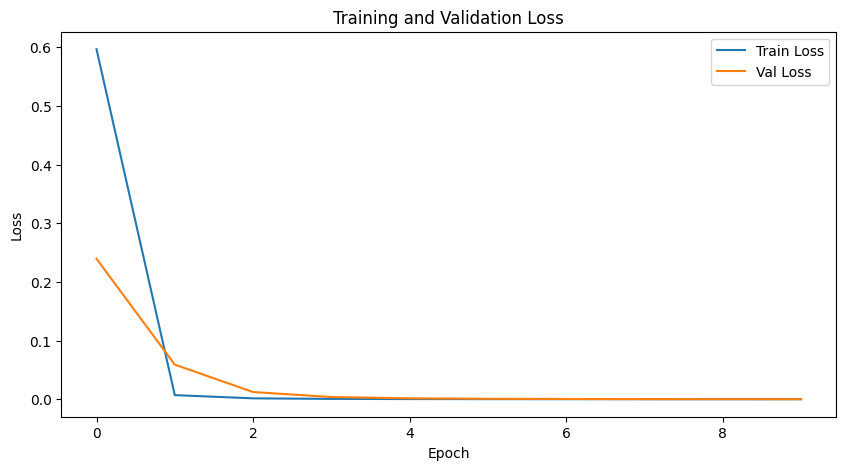

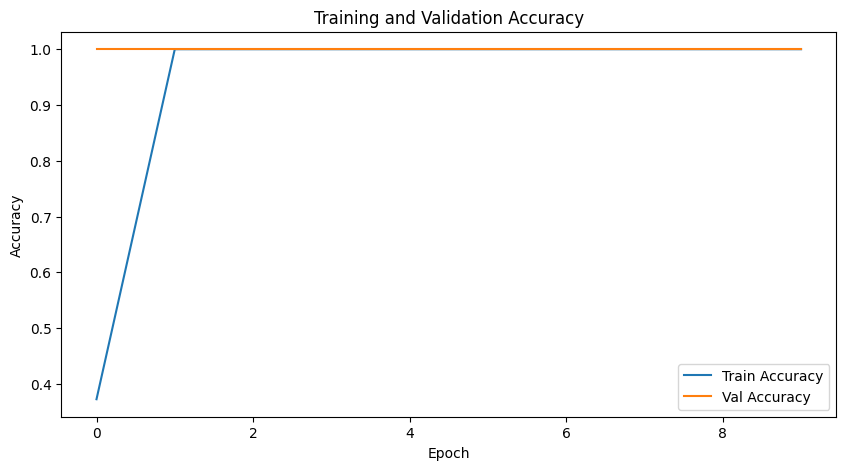

In [3]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define transforms for data preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_names = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        img_name = self.file_names[idx]
        img_path = os.path.join(self.root_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = 0 if 'park' in img_name else 1
        return image, label

# Load dataset from the folder using custom dataset class
dataset = CustomDataset(root_dir=r"C:\Users\USER\Downloads\PD audio\acoustic phonotation imageV2", transform=transform)

# Split dataset into train and test sets
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Further split train dataset into train and validation sets
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

# Define dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define ResNet-18 model
class ResNet18(nn.Module):
    def __init__(self):
        super(ResNet18, self).__init__()
        self.resnet18 = models.resnet18(pretrained=False)
        num_ftrs = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Linear(num_ftrs, 2)  # 2 classes: parkinson, control

    def forward(self, x):
        x = self.resnet18(x)
        return x

model = ResNet18()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to calculate accuracy
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    total = labels.size(0)
    correct = (predicted == labels).sum().item()
    return correct / total

# Training and validation
num_epochs = 10
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        correct_train += (outputs.argmax(1) == labels).sum().item()
        total_train += labels.size(0)
    train_acc = correct_train / total_train
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            correct_val += (outputs.argmax(1) == labels).sum().item()
            total_val += labels.size(0)
    val_acc = correct_val / total_val
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# Test the model
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        correct_test += (outputs.argmax(1) == labels).sum().item()
        total_test += labels.size(0)
test_acc = correct_test / total_test
print(f"Test Accuracy: {test_acc:.4f}")

# Plotting the learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()
